# Bayesian Exploration with Xopt

## TNK test function

This is the class method for running Xopt. Use Bayesian exploration to explore the input space.

TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [31]:
# Import the class
from xopt import Xopt

import os
SMOKE_TEST = os.environ.get('SMOKE_TEST')

In [32]:
# To see log messages
from xopt import output_notebook
output_notebook()

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [33]:
import yaml
# Make a proper input file. 
YAML="""
xopt: {output_path: null}

algorithm:
  name: bayesian_exploration
  options:  
      n_initial_samples: 5
      n_steps: 25
      #batch_size: 1                      ## batch size for parallelized optimization
      sigma: [0.1, 0.1]                ## proximal biasing term

  
evaluate:
  name: test_TNK
  function: xopt.tests.test_functions.TNK.evaluate_TNK
  
vocs:
  name: TNK_test
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: ['LESS_THAN', 0.5]
  linked_variables: {}
  constants: {a: dummy_constant}

"""
config = yaml.safe_load(YAML)

if SMOKE_TEST:
    config['algorithm']['options']['n_steps'] = 3
    config['algorithm']['options']['generator_options']['num_restarts'] = 2
    config['algorithm']['options']['generator_options']['raw_samples'] = 2

In [34]:
X = Xopt(config)
X

Loading config from dict.
`name` keyword no longer allowed in vocs config, removing
Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.



            Xopt 
________________________________           
Version: 0.5.0+9.gb90b083.dirty
Configured: True
Config as YAML:
xopt: {output_path: null}
algorithm:
  name: bayesian_exploration
  options:
    n_initial_samples: 5
    n_steps: 25
    sigma: [0.1, 0.1]
    output_path: .
    batch_size: 1
    mc_samples: 1024
  type: batched
  function: null
evaluate:
  name: test_TNK
  function: xopt.tests.test_functions.TNK.evaluate_TNK
  executor: null
  options: {extra_option: abc}
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {}
  constants: {a: dummy_constant}

# Run BayesOpt

In [35]:
# Pick one of these
from concurrent.futures import ThreadPoolExecutor as PoolExecutor
#from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [36]:
# Change max generations
results = X.run()

Starting at time 2021-10-15T14:34:38-05:00
Generating and submitting initial samples
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
gen

# Plot
- plot input space samples -> yellow points satisfy constraints and purple points do not

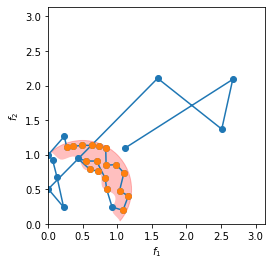

In [37]:
import torch
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# get results and get valid observations
train_x = results[config['vocs']['variables']].to_numpy()
valid_x = results[config['vocs']['variables']].loc[results['feas']].to_numpy()

# plot results
ax.plot(train_x[:, 0], train_x[:, 1], 'o-')
ax.set_ylabel('$f_2$')
ax.set_xlabel('$f_1$')

ax.plot(valid_x[:,0], valid_x[:,1],'C1o')

# plot valid region
theta = np.linspace(0,np.pi/2)
r = np.sqrt(1 + 0.1*np.cos(16*theta))
x_1 = r*np.sin(theta)
x_2_lower = r*np.cos(theta)
x_2_upper = (0.5 - (x_1 - 0.5)**2)**0.5 + 0.5

z = np.zeros_like(x_1)

#ax2.plot(x_1, x_2_lower,'r')
ax.fill_between(x_1, z, x_2_lower, fc='white')
circle = plt.Circle((0.5, 0.5), 0.5**0.5,
                    color='r', alpha=0.25, zorder=0,
                    label='Valid Region')
ax.add_patch(circle)
ax.set_xlim(0,np.pi)
ax.set_ylim(0,np.pi)
ax.set_aspect('equal')

plt.show()

In [38]:
results


,x1,x2,a,y1,y2,c1,c2,some_array,status,x1_t,x2_t,y1_t,c1_t,c2_t,c1_f,c2_f,feas
0,1.115365,1.098761,dummy_constant,1.115365,1.098761,1.352034,0.737189,"[1, 2, 3]",done,0.355032,0.349747,-0.423205,-0.295550,0.081602,True,False,False
1,2.669188,2.089469,dummy_constant,2.669188,2.089469,10.526495,7.231786,"[1, 2, 3]",done,0.849630,0.665099,1.002470,-2.301059,2.315987,True,False,False
2,2.510419,1.370872,dummy_constant,2.510419,1.370872,7.195762,4.800201,"[1, 2, 3]",done,0.799092,0.436362,0.856795,-1.572971,1.479431,True,False,False
3,1.584007,2.105298,dummy_constant,1.584007,2.105298,6.003853,3.752051,"[1, 2, 3]",done,0.504205,0.670138,0.006787,-1.312424,1.118827,True,False,False
4,0.004071,0.505559,dummy_constant,0.004071,0.505559,-0.843565,0.245976,"[1, 2, 3]",done,0.001296,0.160925,-1.442847,0.184401,-0.087394,False,True,False
5,0.225481,0.243014,dummy_constant,0.225481,0.243014,-0.972722,0.141402,"[1, 2, 3]",done,0.071773,0.077354,0.225481,0.972722,-0.358598,False,True,False
6,0.131020,0.673537,dummy_constant,0.131020,0.673537,-0.429410,0.166261,"[1, 2, 3]",done,0.041705,0.214394,0.131020,0.429410,-0.333739,False,True,False
7,0.065493,0.929001,dummy_constant,0.065493,0.929001,-0.175685,0.372839,"[1, 2, 3]",done,0.020847,0.295711,0.065493,0.175685,-0.127161,False,True,False
8,0.000000,0.996957,dummy_constant,0.000000,0.996957,-0.106077,0.496966,"[1, 2, 3]",done,0.000000,0.317342,0.000000,0.106077,-0.003034,False,True,False
9,0.234340,1.265093,dummy_constant,0.234340,1.265093,0.753157,0.655942,"[1, 2, 3]",done,0.074593,0.402692,0.234340,-0.753157,0.155942,True,False,False
